# Qiskit config

In [1]:
from qiskit import transpile

# Qclib

In [2]:
import numpy as np
import sys
sys.path.append('../../')
from qclib.state_preparation.schmidt import initialize

# Uniform state

In [3]:
min_n = 3
max_n = 10

for n in range(min_n, max_n+1):
    input_state = np.ones(2**n)
    input_state = input_state/np.linalg.norm(input_state)

    circuit = initialize(input_state)
    transpiled_circuit = transpile(circuit, basis_gates=['u1','u2','u3', 'cx'], optimization_level=3)

    count_ops = transpiled_circuit.count_ops()
    n_cx = 0
    if 'cx' in count_ops:
        n_cx = count_ops['cx']
    n_dp = transpiled_circuit.depth()

    print('n = {0}\tCNOTs = {1}\tdepth = {2}'.format(n, n_cx, n_dp))

n = 3	CNOTs = 0	depth = 1
n = 4	CNOTs = 0	depth = 1
n = 5	CNOTs = 0	depth = 1
n = 6	CNOTs = 0	depth = 1
n = 7	CNOTs = 0	depth = 1
n = 8	CNOTs = 0	depth = 1
n = 9	CNOTs = 0	depth = 1
n = 10	CNOTs = 0	depth = 1


# Random rank 1 state

In [5]:
# input_state.reshape(lines, cols) is a matrix with equal columns.

rnd = np.random.RandomState(42)

min_n = 3
max_n = 10

for n in range(min_n, max_n+1):
    N = 2**n
    input_state = ((1.0 - 0.001) * rnd.rand(N) + 0.001) + ((1.0 - 0.001) * rnd.rand(N) + 0.001) * 1j

    odd = n % 2
    cols = int(2**(n//2 + odd))
    for i in range(N):
        if i % cols != 0:
            input_state[i] = input_state[i-1]
            
    input_state = input_state/np.linalg.norm(input_state)

    circuit = initialize(input_state)
    transpiled_circuit = transpile(circuit, basis_gates=['u1','u2','u3', 'cx'], optimization_level=3)

    count_ops = transpiled_circuit.count_ops()
    n_cx = 0
    if 'cx' in count_ops:
        n_cx = count_ops['cx']
    n_dp = transpiled_circuit.depth()

    print('n = {0}\tCNOTs = {1}\tdepth = {2}'.format(n, n_cx, n_dp))

n = 3	CNOTs = 0	depth = 1
n = 4	CNOTs = 1	depth = 3
n = 5	CNOTs = 1	depth = 3
n = 6	CNOTs = 4	depth = 9
n = 7	CNOTs = 4	depth = 9
n = 8	CNOTs = 9	depth = 11
n = 9	CNOTs = 9	depth = 11
n = 10	CNOTs = 26	depth = 53


# Random sparse states

In [4]:
import random
rnd = np.random.RandomState(42)

min_n = 3
max_n = 10
zeros = 0.75

for n in range(min_n, max_n+1):
    print('\nn = {0}'.format(n))
    
    N = int(2**n * (1-zeros))
    rand = ((1.0 - 0.001) * rnd.rand(N) + 0.001) + ((1.0 - 0.001) * rnd.rand(N) + 0.001) * 1j
    
    # Randomly distributed amplitudes and zeros.
    #input_state = random.sample([0]*(2**n-len(rand)) + list(rand), 2**n)
    # All amplitudes at the beginning of the state.
    input_state = list(rand) + [0]*(2**n-len(rand))
    
    input_state = input_state/np.linalg.norm(input_state)

    for m in list(range(n//2+1))[::-1]: # iso:{1<=rank<2**(n_qubits//2)};uni:{rank=2**(n_qubits//2)}
        r = 2**m

        circuit = initialize(input_state, low_rank = r)
        transpiled_circuit = transpile(circuit, basis_gates=['u1','u2','u3', 'cx'], optimization_level=3)
        
        count_ops = transpiled_circuit.count_ops()
        n_cx = 0
        if 'cx' in count_ops:
            n_cx = count_ops['cx']
        n_dp = transpiled_circuit.depth()
        
        print('\trank = {0}\tCNOTs = {1}\tdepth = {2}'.format(r, n_cx, n_dp))


n = 3
	rank = 2	CNOTs = 0	depth = 1
	rank = 1	CNOTs = 0	depth = 1

n = 4
	rank = 4	CNOTs = 1	depth = 3
	rank = 2	CNOTs = 1	depth = 3
	rank = 1	CNOTs = 1	depth = 3

n = 5
	rank = 4	CNOTs = 4	depth = 9
	rank = 2	CNOTs = 4	depth = 9
	rank = 1	CNOTs = 4	depth = 9

n = 6
	rank = 8	CNOTs = 19	depth = 23
	rank = 4	CNOTs = 19	depth = 23
	rank = 2	CNOTs = 19	depth = 23
	rank = 1	CNOTs = 4	depth = 9

n = 7
	rank = 8	CNOTs = 34	depth = 51
	rank = 4	CNOTs = 34	depth = 51
	rank = 2	CNOTs = 34	depth = 51
	rank = 1	CNOTs = 9	depth = 11

n = 8
	rank = 16	CNOTs = 101	depth = 115
	rank = 8	CNOTs = 101	depth = 115
	rank = 4	CNOTs = 101	depth = 115
	rank = 2	CNOTs = 43	depth = 51
	rank = 1	CNOTs = 10	depth = 11

n = 9
	rank = 16	CNOTs = 166	depth = 243
	rank = 8	CNOTs = 166	depth = 243
	rank = 4	CNOTs = 166	depth = 243
	rank = 2	CNOTs = 74	depth = 111
	rank = 1	CNOTs = 27	depth = 53

n = 10
	rank = 32	CNOTs = 504	depth = 518
	rank = 16	CNOTs = 504	depth = 518
	rank = 8	CNOTs = 504	depth = 518
	rank = 4	C

# Random dense states

In [5]:
min_n = 3
max_n = 10

result = {}
for n in range(min_n, max_n+1):
    print('\nn = {0}'.format(n))

    N = 2**n
    input_state = ((1.0 - 0.001) * rnd.rand(N) + 0.001) + ((1.0 - 0.001) * rnd.rand(N) + 0.001) * 1j
    input_state = input_state/np.linalg.norm(input_state)

    result[n] = []
    
    for m in list(range(n//2+1))[::-1]: # iso:{1<=rank<2**(n_qubits//2)};uni:{rank=2**(n_qubits//2)}
        r = 2**m

        circuit = initialize(input_state, low_rank = r)
        transpiled_circuit = transpile(circuit, basis_gates=['u1','u2','u3', 'cx'], optimization_level=3)
        
        count_ops = transpiled_circuit.count_ops()
        n_cx = 0
        if 'cx' in count_ops:
            n_cx = count_ops['cx']
        n_dp = transpiled_circuit.depth()
        
        result[n].append([m, n_cx, n_dp])
        
        print('\trank = {0}\tCNOTs = {1}\tdepth = {2}'.format(r, n_cx, n_dp))



n = 3
	rank = 2	CNOTs = 4	depth = 9
	rank = 1	CNOTs = 1	depth = 3

n = 4
	rank = 4	CNOTs = 9	depth = 11
	rank = 2	CNOTs = 7	depth = 9
	rank = 1	CNOTs = 2	depth = 3

n = 5
	rank = 4	CNOTs = 30	depth = 53
	rank = 2	CNOTs = 14	depth = 23
	rank = 1	CNOTs = 5	depth = 9

n = 6
	rank = 8	CNOTs = 54	depth = 57
	rank = 4	CNOTs = 51	depth = 51
	rank = 2	CNOTs = 21	depth = 23
	rank = 1	CNOTs = 8	depth = 9

n = 7
	rank = 8	CNOTs = 150	depth = 243
	rank = 4	CNOTs = 84	depth = 115
	rank = 2	CNOTs = 36	depth = 51
	rank = 1	CNOTs = 13	depth = 11

n = 8
	rank = 16	CNOTs = 252	depth = 245
	rank = 8	CNOTs = 250	depth = 242
	rank = 4	CNOTs = 117	depth = 115
	rank = 2	CNOTs = 51	depth = 51
	rank = 1	CNOTs = 18	depth = 11

n = 9
	rank = 16	CNOTs = 660	depth = 1037
	rank = 8	CNOTs = 389	depth = 518
	rank = 4	CNOTs = 182	depth = 243
	rank = 2	CNOTs = 82	depth = 111
	rank = 1	CNOTs = 35	depth = 53

n = 10
	rank = 32	CNOTs = 1087	depth = 1081
	rank = 16	CNOTs = 1105	depth = 1076
	rank = 8	CNOTs = 528	depth = 5

# Plot dense results

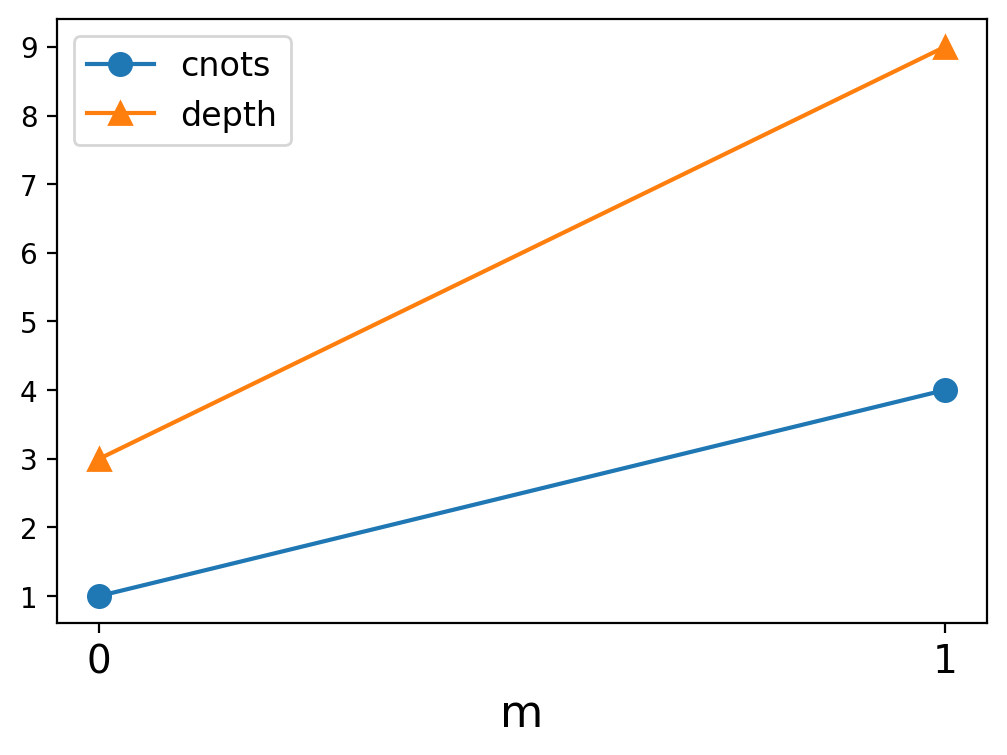

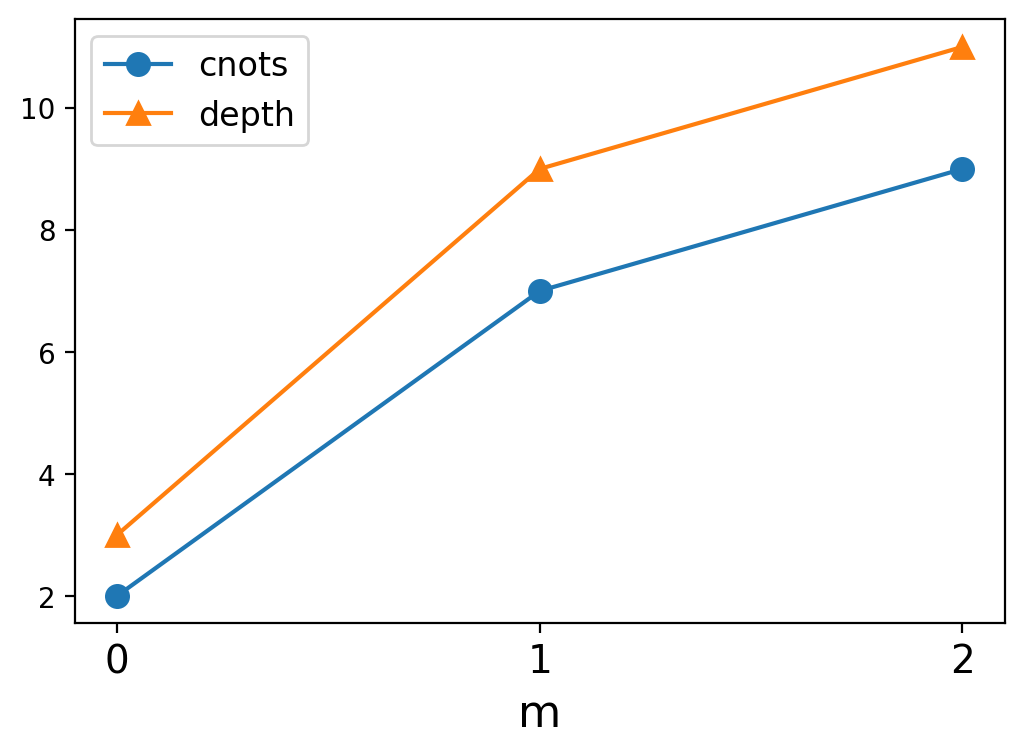

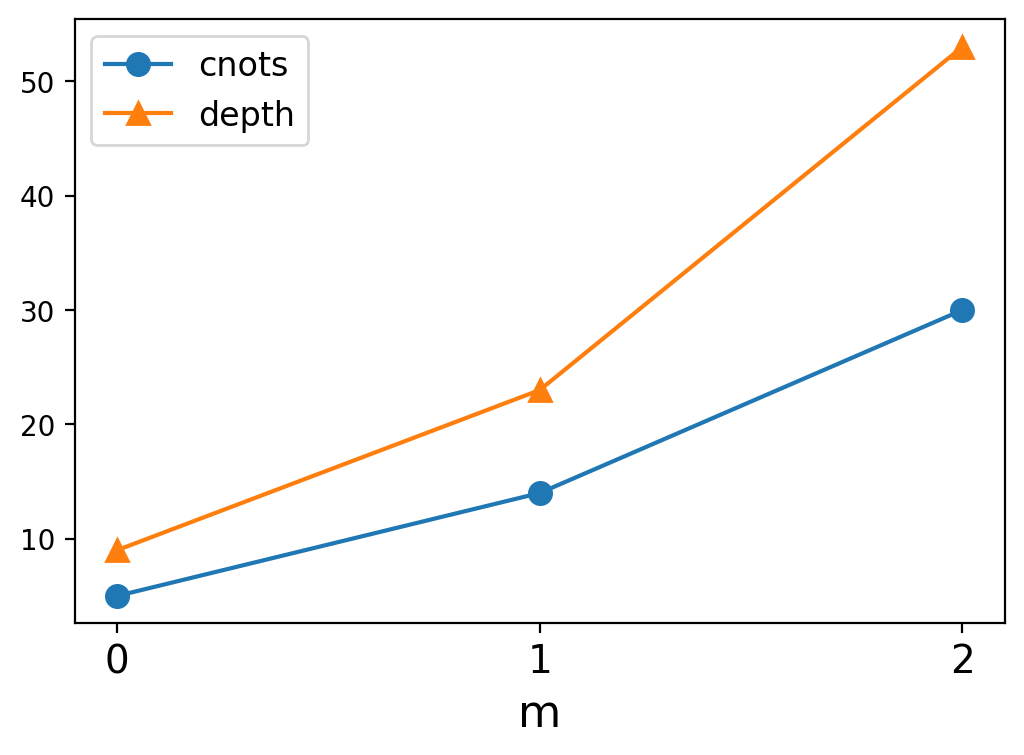

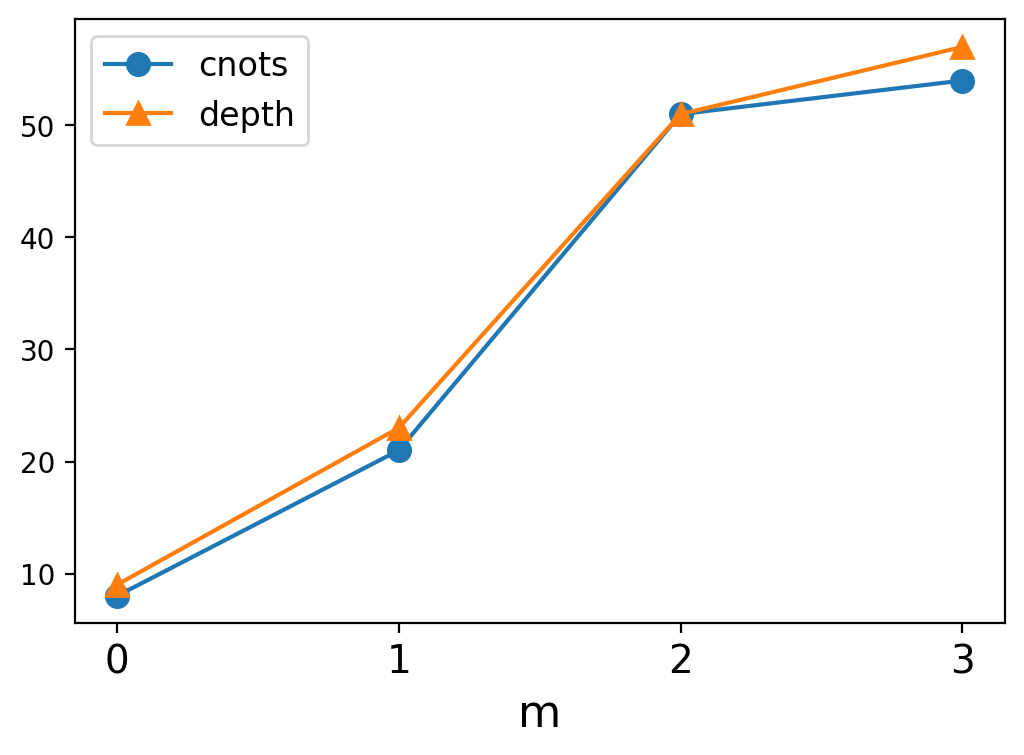

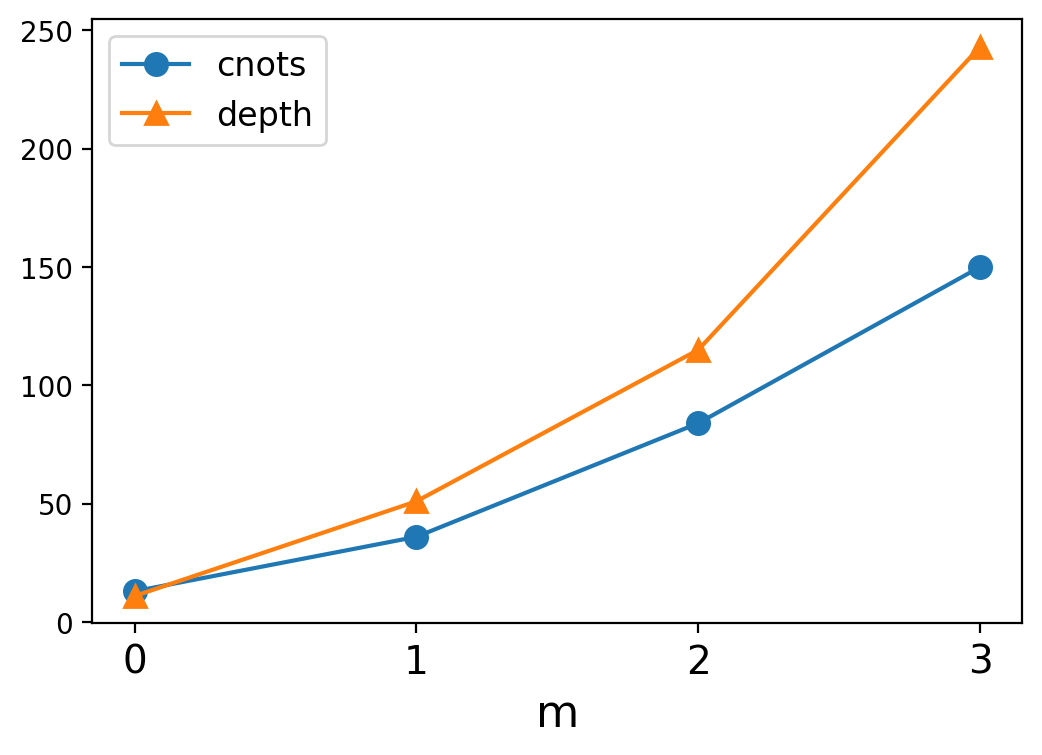

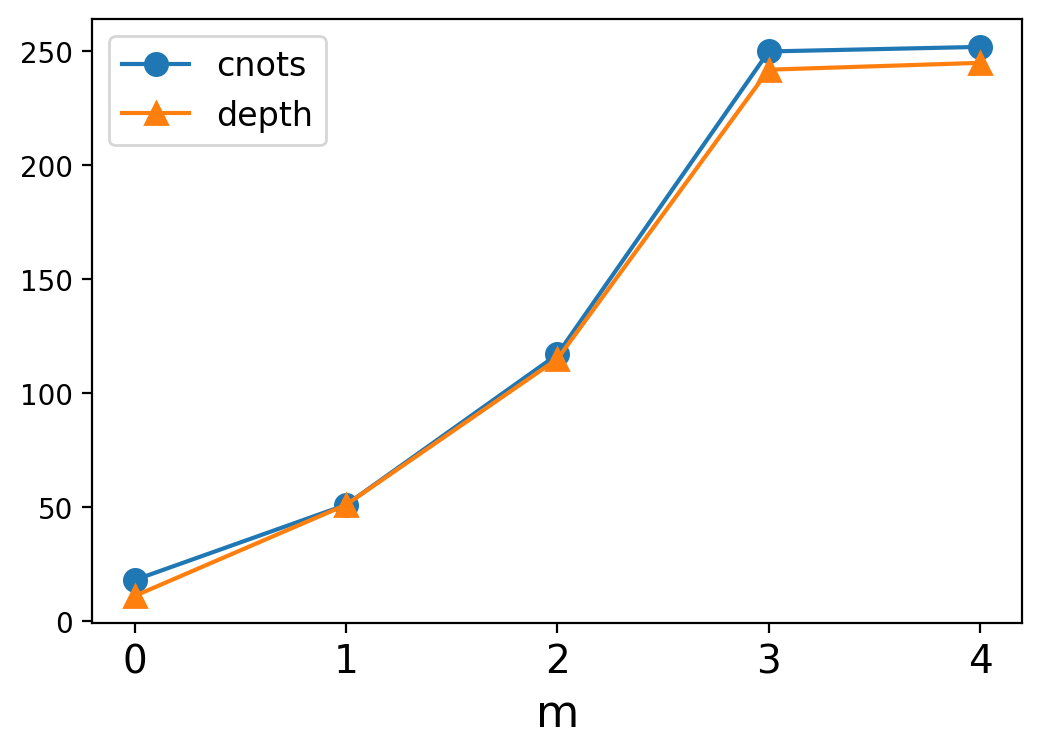

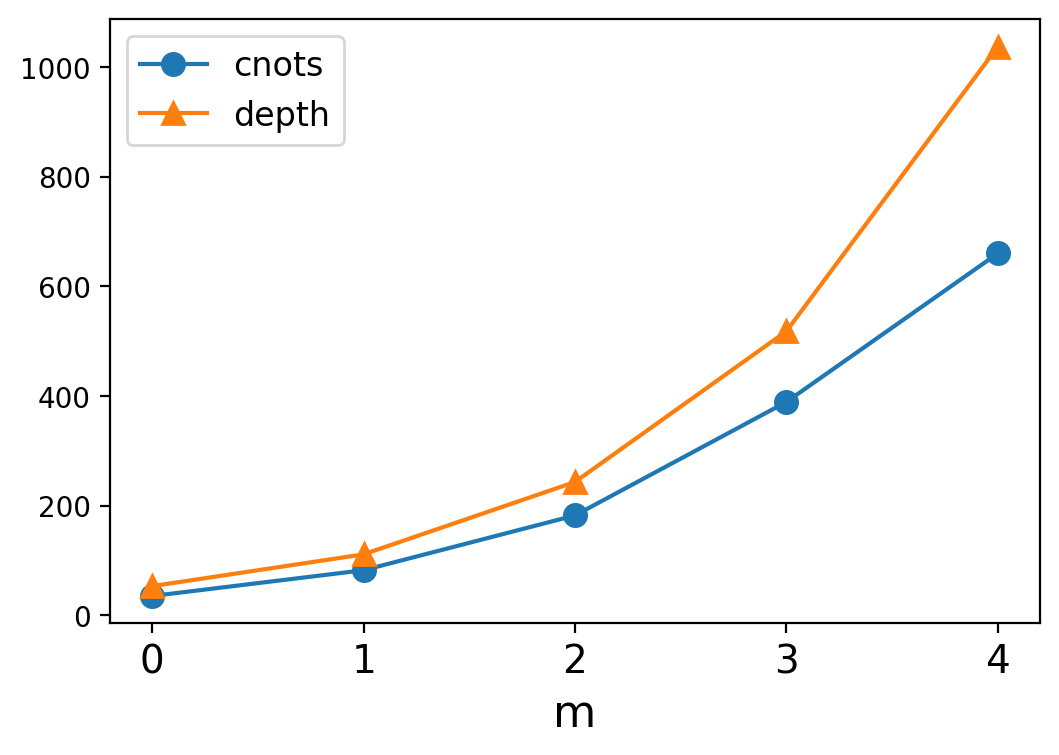

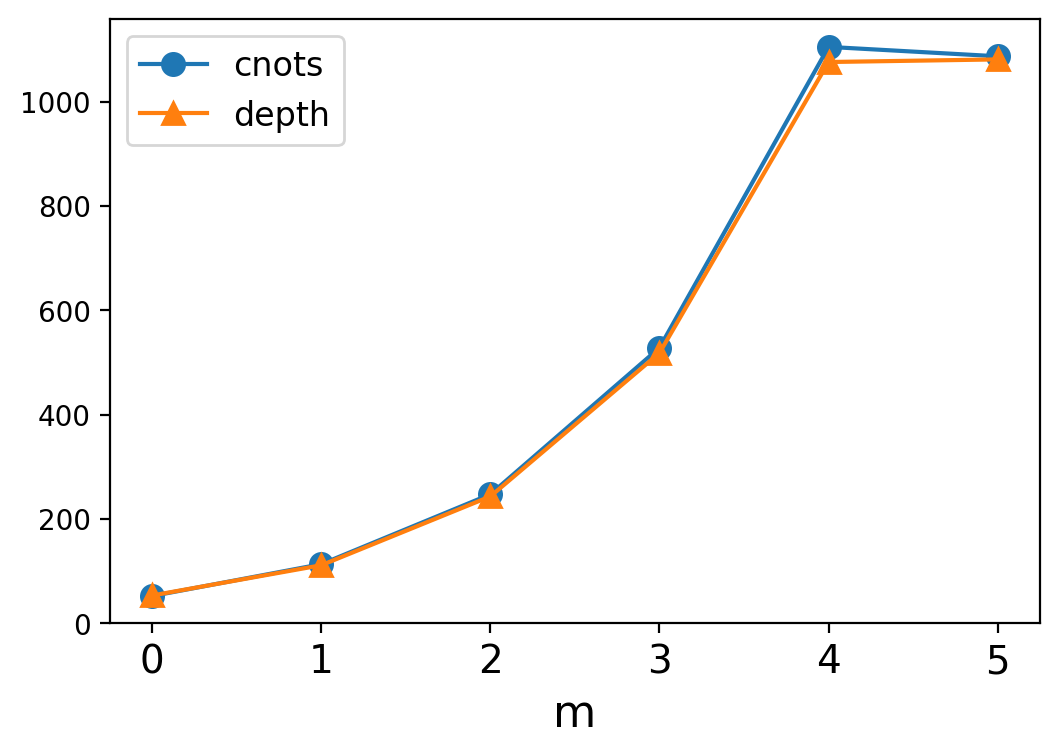

In [6]:
def plot(r, n_cx, n_dp):
    # libraries
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Data
    df=pd.DataFrame({ 'x_values': r, 'cnots': n_cx, 'depth': n_dp })

    # multiple line plots
    plt.plot( 'x_values', 'cnots' , data=df, marker='o', markersize=8)
    plt.plot( 'x_values', 'depth' , data=df, marker='^', markersize=8)
    plt.xticks(r) # force integer on x axis
    # show legend
    plt.legend()
    
    # config
    plt.legend(fontsize=12)
    plt.xticks(r, fontsize=14)
    plt.xlabel('m', fontsize=16)
    plt.gcf().set_dpi(200)
    
    # show graph
    plt.show()

def plot_result(n, result):
    r_range = [r[0] for r in result[n]]
    n_cx    = [r[1] for r in result[n]]
    n_dp    = [r[2] for r in result[n]]

    plot(r_range, n_cx, n_dp)

for n in range(min_n, max_n+1):
    plot_result(n, result)